<< 이미지 영상 변환 영역 처리 >>
1. 허프변환
2. 코너 검출
3. k-최근접 이웃 분류기
4. 영상을 이용한 워핑과 모핑

1. 허프변환
    - 영상내의 선, 원, 임의형태를 지닌 물체를 감지하는 기술, 직선 검출에 사용한다
    - 직교 좌표계로 표현되는 영상의 에지 점들을 극좌표계로 옮겨 검출하고 하는 파라미터로 추출한다.
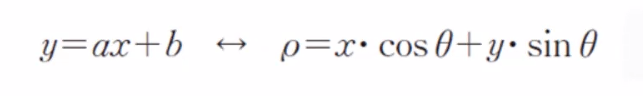
    
2. 허프변환의 단계
    - 1) 극 좌표계로 누적행렬
    - 2) 영상화소의 직선 검사
    - 3) 직선 좌표에 대한 극좌표 누적 행렬
    - 4) 누적 행렬의 지역 최댓값 선정
    - 5) 직선 선별 - 임계값 이상인 누적값 선택 및 내림차순으로 정렬
    
3. 허프변환의 활용
    - 직선검출 : 영상내에 공간 구조로 검출
    - 직선 검출 후 응용 : 차선, 장애물 자동인식 시스템 - 차선검출, 스캐너 기능 대신 앱(네개 모서리 검출), 음계 탐색
    - 문제점(직교좌표에 대한 문제점) : 수직선일 경우에 기울기가 무한대, 검출되는 직선의 간격이 동일하지 않아서 검출 속도 및 정밀도에서 문제가 발생할 수 있다

2. 코너 검출 : 영상에서 경계가 만나는 지점의 특정한 모양을 갖는 곳을 가르킨다
    - 코너 정보들 중에서 영상의 왜곡에도 불변하는 특징을 가진 지점들이 영상 매칭에 사용된다
    - 해리스 코너 검출 : 영상의 평행이동, 회전변화 불변(invariant), 어파인(affine)변환, 조명 변화도 추출할 수 있다.

3. 동영상 로드 : cv2.VideoCapture
                 cv2.accumulateWeighted(src, dst, alpha[, mask]) -> dst  # 이미지의 가중 평균값을 구하는 함수
                 cv2.absdiff(src1, src2[, dst]) -> dst
                 cv2.threshold(src, thresh, maxval, type[, dst]) -> retval, dst
                 cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
                 cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
4. 카메라 가져오기
5. 동영상 사이즈, FPS, 프레임 리턴, 설정
6. 영상 녹화(웹카메라)
7. SAD, SSD, NCC

In [ ]:
# 모듈을 임포트 해보자
# 1) 동영상 로드
import numpy as np
import cv2

filepath = 'myImg\\01_People.avi'
# 동영상 로드
cp = cv2.VideoCapture(filepath)

while(cp.isOpened()):
    # 프레임으로 리턴
    ret, frame = cp.read()
    # 확인
    if ret:
        cv2.imshow("my_frame", frame)
        cv2.waitKey(1)
    else:
        cp.release()
        
cv2.destroyAllWindows()

In [1]:
# 모듈을 임포트 해보자
# 1) 동영상 로드를 해서 움직임을 포착해보자
import numpy as np
import cv2

filepath = 'myImg\\output.avi'
# 동영상 로드
cp = cv2.VideoCapture(filepath)
avg = None

while True:
    ret, frame = cp.read()
    if not ret:
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if avg is None:
        avg = gray.copy().astype("float")  # 이미지 영상의 ndarray를 float로 변환 후 반복 실행
        continue
    
    cv2.accumulateWeighted(gray, avg, 0.6)
    fromDelta = cv2.absdiff(gray, cv2.convertScaleAbs(avg))
    
    thresh = cv2.threshold(fromDelta, 3, 255, cv2.THRESH_BINARY)[1]
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    frame = cv2.drawContours(frame, contours, -1, (0,255,0), 3)
    cv2.imshow("my_frame", frame)
    cv2.waitKey(1)
    
        
cv2.destroyAllWindows()